# Exploratory Data Analysis

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize, scale
from collections import Counter, defaultdict
import ast

<hr>

In [87]:
# Import data
talks = pd.read_csv("ted_talks_ratings .csv")
talks.head()

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,Informative,Ingenious,Inspiring,Longwinded,Unconvincing,Fascinating,Jaw-dropping,Persuasive,OK,Obnoxious
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,...,0.078274,0.064710,0.265573,0.004124,0.003197,0.112744,0.047299,0.114054,0.012509,0.002227
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,...,0.150886,0.019074,0.140668,0.038488,0.087875,0.044959,0.039510,0.091281,0.069142,0.044619
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,...,0.139873,0.064802,0.081445,0.027620,0.036827,0.058782,0.019122,0.081445,0.051700,0.050283
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,...,0.101931,0.028165,0.287017,0.014217,0.009657,0.035408,0.061695,0.123391,0.022800,0.009388
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,...,0.212061,0.124980,0.112920,0.004294,0.002615,0.179781,0.145824,0.099219,0.009680,0.002381


In [88]:
talks.isnull().any() # Check for null values, resuts: speaker_occupation

Unnamed: 0            False
comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
Beautiful             False
Confusing             False
Courageous            False
Funny                 False
Informative           False
Ingenious             False
Inspiring             False
Longwinded            False
Unconvincing          False
Fascinating           False
Jaw-dropping          False
Persuasive            False
OK                    False
Obnoxious             False
dtype: bool

** Note: Dropping "URL" and "Speaker_occupation" from the dataset **

In [89]:
talks = talks.drop(["url", "speaker_occupation"], axis = 1)

<h3> Add features of interest </h3>

**Add the following new columns**
- Length of Ted Talk title
- Total number of tags
- Length of description 
- Positive Ratings: 'Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating'
- Moderate Ratings: 'Informative','OK','Persuasive'
- Negative Ratings: 'Longwinded','Unconvincing','Obnoxious','Confusing'
- Event type (7 new columns + event class): "is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other"
- Top Tags: "is_culture", "is_technology", "is_science", "is_business", "is_TEDx", "is_globalIssues", "is_entertainment", "is_design", "is_psychology", "is_brain"

In [90]:
tl = [] # Title Length
for t in talks["title"]: tl.append(len(t))
talks["titleLength"] = tl

nt = [] # Number of tags
for n in talks["tags"]:
    n = eval(n)
    nt.append(len(n))
talks["numTags"] = nt

d = [] # Length of description
for s in talks["description"]:d.append(len(s))
talks["descLength"] = d

In [94]:
# All the ratings
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring']

In [95]:
#Categorize the ratings into the three broad categories
positive = ['Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating']
negative = ['Longwinded','Unconvincing','Obnoxious','Confusing']
moderate = ['Informative','OK','Persuasive']

In [96]:
talks['Positive'] = talks['Funny'] + talks['Beautiful'] + talks['Ingenious'] + talks['Courageous'] + talks['Inspiring'] + talks['Jaw-dropping'] + talks['Fascinating']
talks['Moderate'] = talks['OK'] + talks["Informative"] + talks["Persuasive"]
talks['Negative'] = talks['Longwinded'] + talks['Unconvincing'] + talks['Obnoxious'] + talks['Confusing']

In [97]:
talks[['Positive','Moderate','Negative']].head()

,Positive,Moderate,Negative
0,0.783037,0.204838,0.012126
1,0.496594,0.311308,0.192098
2,0.602691,0.273017,0.124292
3,0.710032,0.248122,0.041845
4,0.666940,0.320960,0.012100


In [98]:
talks[['Positive','Moderate','Negative']].describe()

,Positive,Moderate,Negative
count,2550.000000,2550.000000,2550.000000
mean,0.626443,0.297277,0.076280
std,0.176802,0.150686,0.079005
min,0.124231,0.017906,0.000000
25%,0.497550,0.176137,0.025331
50%,0.636618,0.289350,0.050108
75%,0.763865,0.404682,0.095919
max,0.973929,0.723623,0.777190


** Event Type ** <br>
Can help determine if a TED talk is more likely to be viewed if they are given
at a bigger event/convention. There are a lot of different events (355) therefore 
we will condense the data into broader categories
- Year TED Conference: Main event, 5 day annual conference
- TEDx: Independent/locally hosted TED events
- TEDGlobal: Annual 5 day conference
- TEDWoman: 3 day conference
- TEDSalon: Small weekly/monthly events
- TEDNYC: Hosted in NYC
- Other
    

In [99]:
# Event type
len(talks['event'].unique())

355

In [100]:
talks["event_class"] = "Other"
#Loop over every talk and assign event category based on name of event
for ii in range(len(talks)):
    if talks['event'][ii].count('TED20') >0:
        talks['event_class'][ii] = 'Yearly TED Conference'
    elif talks['event'][ii].count('TED19') >0:
        talks['event_class'][ii] = 'Yearly TED Conference'
    elif talks['event'][ii].count('TEDx') >0:
        talks['event_class'][ii] = 'TEDx'
    elif talks['event'][ii].count('TEDGlobal') >0:
        talks['event_class'][ii] = 'TEDGlobal'
    elif talks['event'][ii].count('TEDWomen') >0:
        talks['event_class'][ii] = 'TEDWomen'
    if talks['event'][ii].count('TEDSalon') >0:
        talks['event_class'][ii] = 'TEDSalon'
    if talks['event'][ii].count('TEDNYC') >0:
        talks['event_class'][ii] = 'TEDNYC'
    else:
        pass;

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3

In [101]:
talks['event_class'].unique()

array(['Yearly TED Conference', 'TEDGlobal', 'TEDSalon', 'Other', 'TEDx',
       'TEDWomen', 'TEDNYC'], dtype=object)

In [102]:
b = talks["event_class"] == "Yearly TED Conference"
talks["is_yearlyTedConference"]= b.astype(int)

b = talks["event_class"] == "TEDGlobal"
talks["is_TEDGlobal"]= b.astype(int)

b = talks["event_class"] == "TEDSalon"
talks["is_TEDSalon"]= b.astype(int)

b = talks["event_class"] == "Other"
talks["is_Other"]= b.astype(int)

b = talks["event_class"] == "TEDx"
talks["is_TEDx"]= b.astype(int)

b = talks["event_class"] == "TEDWomen"
talks["is_TEDWomen"]= b.astype(int)

b = talks["event_class"] == "TEDNYC"
talks["is_TEDNYC"]= b.astype(int)

In [103]:
talks[["is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other" ]].describe()

,is_yearlyTedConference,is_TEDGlobal,is_TEDSalon,is_TEDx,is_TEDWomen,is_TEDNYC,is_Other
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,0.383529,0.181961,0.030980,0.184706,0.037647,0.007451,0.173725
std,0.486341,0.385888,0.173299,0.388135,0.190378,0.086014,0.378948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 38.88% TedX
- 38.35% Yearly Ted Conference
- 18.19% TEDGlobal
- 3% TEDSalon
- 3% TedWomen
- 1.67% Other
- 0.6% TEDNYC

**Top Tags** <br>
Tags provide us a high level overview of what the TED talk is about. We picked the top 10 reoccuring tags.

In [104]:
# Top Tags
def build_tag_dict(data):
    tag_dict = defaultdict(int)
    for talk_idx in range(len(data)):
        tag_lst = ast.literal_eval(data['tags'][talk_idx])
        for tag in tag_lst:
            tag_dict[tag] += 1
    tag_count = Counter(tag_dict)
    return [tup[0] for tup in tag_count.most_common(10)]

top_tags = build_tag_dict(talks)
top_tags

['technology',
 'science',
 'global issues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation']

In [105]:
def tags_conversion(data):
    rows = data.shape[0]
    tags_mtx = np.zeros((rows, 10))
    for talk_idx in range(len(data)):
        tag_lst = ast.literal_eval(data['tags'][talk_idx])
        for tag_ind in range(len(top_tags)):
            top_tag = top_tags[tag_ind]
            if top_tag in tag_lst:
                tags_mtx[talk_idx,tag_ind] = 1
    df = pd.DataFrame(tags_mtx, columns=top_tags)
    return df

In [106]:
tags_data = tags_conversion(talks)
talks[["is_technology", "is_science", "is_globalIssue", "is_culture", "is_TEDx", "is_design", "is_business", "is_entertainment", "is_health", "is_innovation"]] = tags_data

<h3> Build Correlation Matrix </h3>

In [107]:
talksC = talks.select_dtypes(include=[np.number])
talksC = talksC.drop(["Positive", "Moderate", "Negative"], axis = 1)

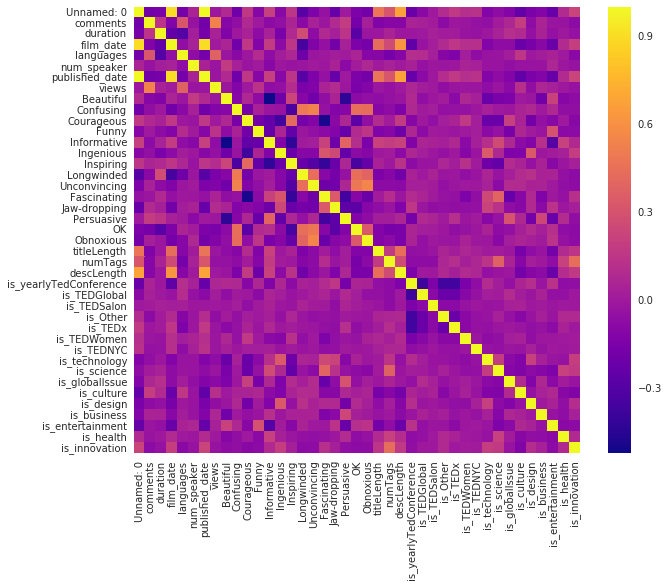

In [108]:
# Unnormalized
corr = talksC.corr();
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

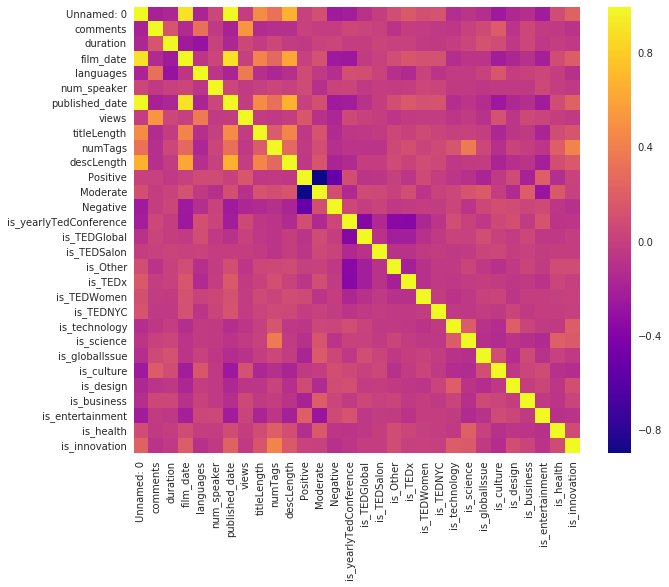

In [110]:
# REMOVE RATINGS
sns.set()
talksC = talks.select_dtypes(include=[np.number])
talksC = talksC.drop(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring'], axis = 1)
# Unnormalized
corr = talksC.corr();
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

In [ ]:
plt.imshow(row[None, :], cmap=plt.cm.jet, interpolation='nearest')

In [112]:
talks.to_csv("TedTalksNewFeatures.csv", sep=',')

<hr>

### Ted Events

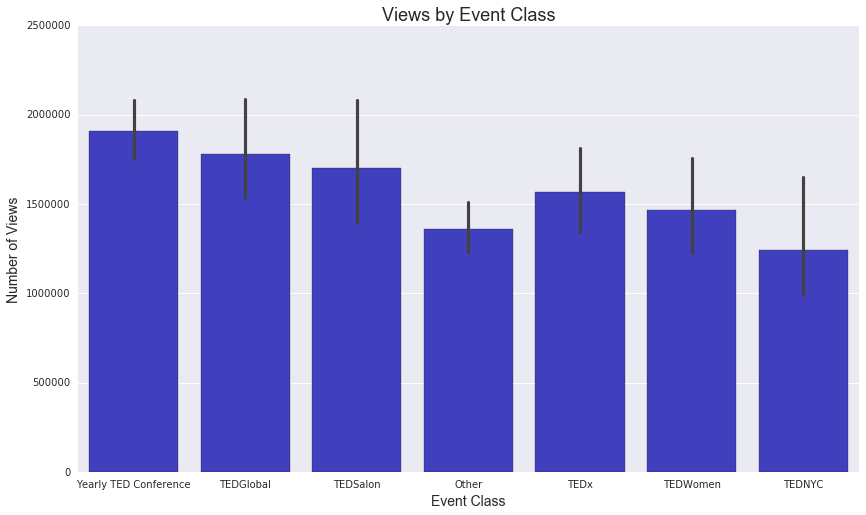

In [56]:
sns.set()
f, ax = plt.subplots(figsize = (14,8))
sns.barplot(data=talks,x='event_class',y='views', color = "blue", saturation = 0.5)
plt.title("Views by Event Class", fontsize = 18)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Event Class", fontsize = 14)

In [ ]:
bins = [i for i in range(0,15000000,500000)];


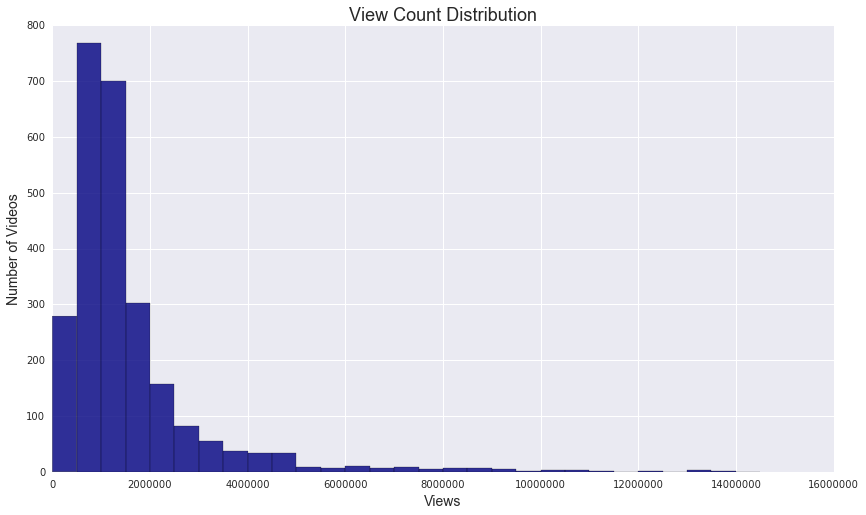

In [29]:
bins = [i for i in range(0,15000000,500000)];
f, ax = plt.subplots(figsize = (14,8))
g = sns.distplot(talks["views"], kde=False, bins = bins, color = "navy", hist_kws = {"alpha":0.8});
plt.title("View Count Distribution", fontsize = 18)
plt.ylabel("Number of Videos", fontsize = 14)
plt.xlabel("Views", fontsize = 14)
plt.ticklabel_format(style='plain', axis='x')

In [30]:
talks["views"].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [66]:
# Top 10 talks by views
talk_views = talks[['name', 'views']]
sorted_talks_by_views = talk_views.sort_values('views', ascending=False)
top_10_talks = sorted_talks_by_views.head(10)
top_10_talks

,name,views
0,Ken Robinson: Do schools kill creativity?,47227110
1346,Amy Cuddy: Your body language may shape who yo...,43155405
677,Simon Sinek: How great leaders inspire action,34309432
837,Brené Brown: The power of vulnerability,31168150
452,Mary Roach: 10 things you didn't know about or...,22270883
1776,Julian Treasure: How to speak so that people w...,21594632
201,Jill Bolte Taylor: My stroke of insight,21190883
5,Tony Robbins: Why we do what we do,20685401
2114,James Veitch: This is what happens when you re...,20475972
1416,Cameron Russell: Looks aren't everything. Beli...,19787465


In [73]:
import datetime
talks['film_date'] = talks['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
talks['published_date'] = talks['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

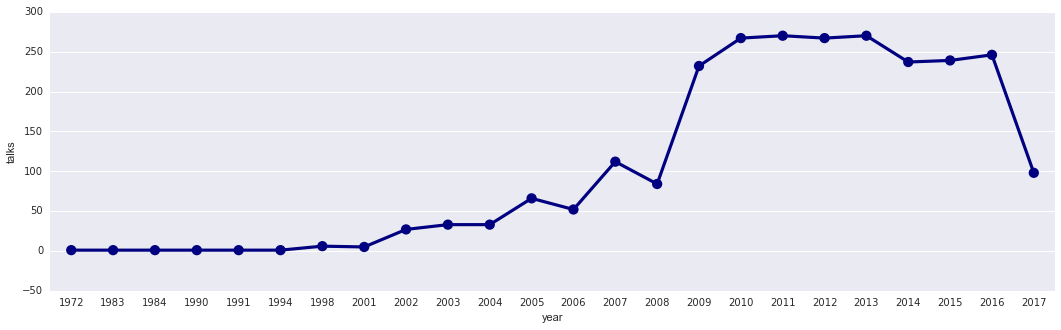

In [77]:
talks2 = talks;
talks2['year'] = talks['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(talks2['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df, color = "navy")

In [80]:
df = pd.read_csv("ted_main.csv")

import ast
talks2['tags'] = talks2['tags'].apply(lambda x: ast.literal_eval(x))

s = talks2.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

ValueError: malformed node or string: ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']

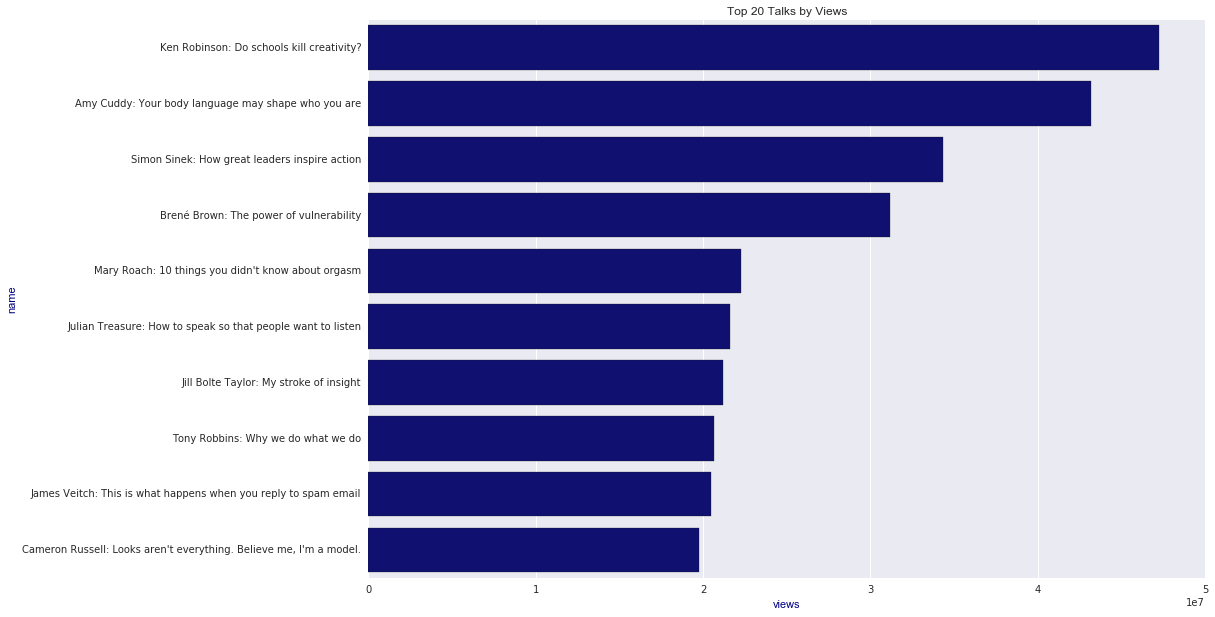

In [72]:
sns.set()
ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x='views', y='name', data=top_10_talks, color = "navy")
plt.xlabel('views',color='navy')
plt.ylabel('name',color='navy')
plt.title("Top 20 Talks by Views")

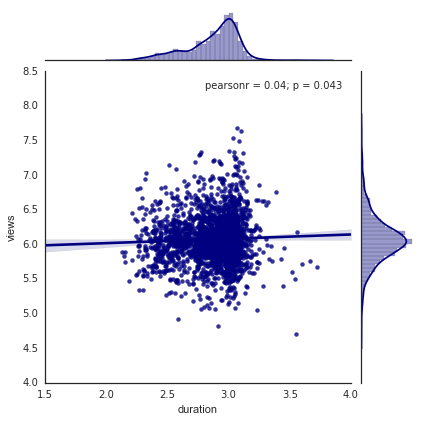

In [62]:
sns.set(style="white", color_codes=True)
y = np.log10(talks["views"])
x = np.log10(talks["duration"])
sns.jointplot(x=x, y=y, data=talks, color = "navy", kind="reg");

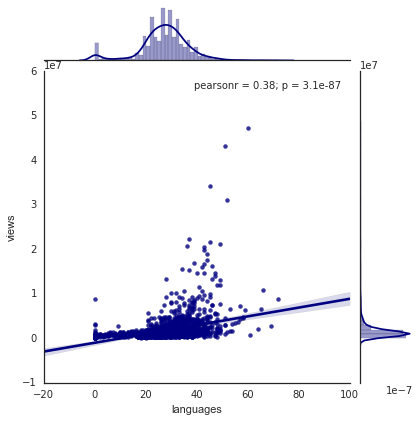

In [54]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='languages', y='views', data=talks, color = "navy", kind="reg", order = 1);

In [ ]:
sns.jointplot(x='views', y='comments', data=talks, color = "navy")

AttributeError: 'module' object has no attribute 'plot'

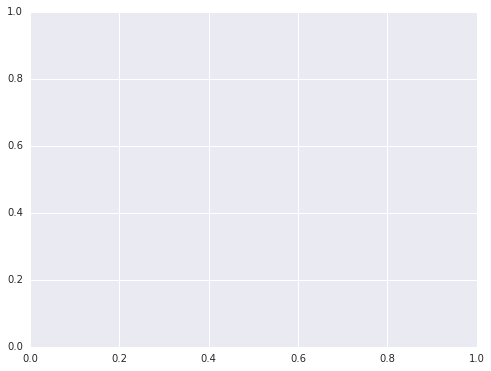

In [39]:
# Comments
sns.set()
f, ax = plt.subplots(figsize = (8,6))
sns.plot(data=talks,x='duration',y='views', color = "navy", order = 2)
plt.title("Relationship of Comments and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Comments", fontsize = 14)

## Ratings relationship with view count

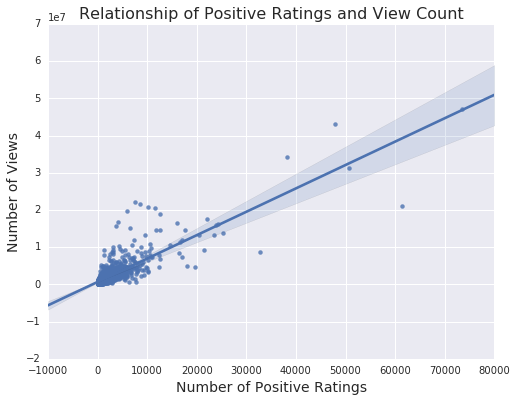

In [40]:
#Positive Ratings vs. View Count
sns.set()
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=talks,x='Positive',y='views')
plt.title("Relationship of Positive Ratings and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Positive Ratings", fontsize = 14)

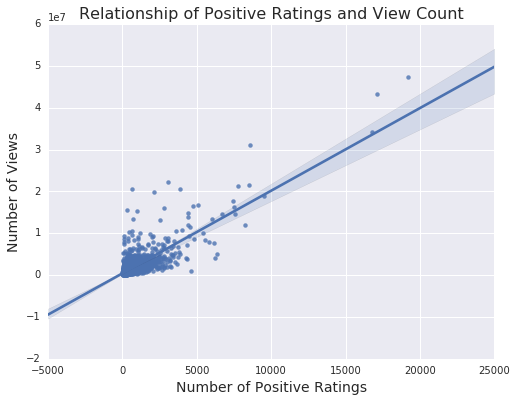

In [39]:
#Moderate Ratings vs. View Count
sns.set()
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=talks,x='Moderate',y='views')
plt.title("Relationship of Positive Ratings and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Positive Ratings", fontsize = 14)

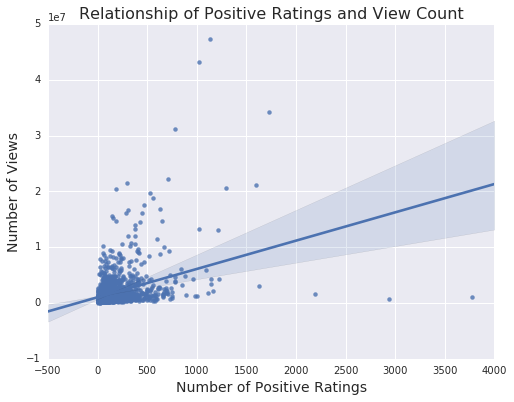

In [38]:
#Negative Ratings vs. View Count
sns.set()
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=talks,x='Negative',y='views')
plt.title("Relationship of Positive Ratings and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Positive Ratings", fontsize = 14)

### Duration versus views: not a linear relationship

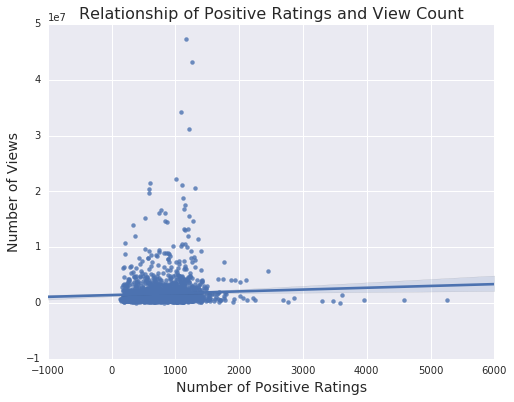

In [37]:
#Duration vs. View Count
sns.set()
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=talks,x='duration',y='views')
plt.title("Relationship of Positive Ratings and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Positive Ratings", fontsize = 14)

In [92]:
# Split data into different "popularity ranks"
rank1 = talks[talks["views"] > 10000000]  # 10 million views plus
rank2 = talks[(talks["views"] <= 10000000) & (talks["views"] > 500000)]  # 5mill - 10mil
rank3 = talks[(talks["views"] <= 500000) & (talks["views"] > 100000)]  # 1mill - 5mil
rank4 = talks[(talks["views"] <= 100000) ]  # Under 1 mil
ranked = [rank1, rank2, rank3, rank4]

In [56]:
r = 0;
print("Popularity Class, Average Views ")
for i in ranked:
    r += 1
    print(r, np.mean(i["views"]))

Popularity Class, Average Views 
1 17956545.7059
2 768292.934896
3 356883.804348
4 66533.0


In [57]:
r = 0;
print("Popularity Class, Average Comments")
for i in ranked:
    r += 1
    print(r, np.mean(i["comments"]))

Popularity Class, Average Comments
1 996.882352941
2 118.005208333
3 90.3369565217
4 35.3333333333


In [58]:
r = 0;
print("Popularity Class, Average number languages translated to ")
for i in ranked:
    r += 1
    print(r, np.mean(i["languages"]))

Popularity Class, Average number languages translated to 
1 43.4705882353
2 24.7330729167
3 18.9673913043
4 0.0


In [59]:
r = 0;
print("Popularity Class, Duration")
for i in ranked:
    r += 1
    print(r, np.mean(i["duration"]))

Popularity Class, Duration
1 963.264705882
2 830.21875
3 825.018115942
4 1591.66666667


In [60]:
r = 0;
print("Popularity Class, Title Length")
for i in ranked:
    r += 1
    print(r, np.mean(i["titleLength"]))

Popularity Class, Title Length
1 32.4705882353
2 34.69140625
3 29.9094202899
4 21.3333333333


In [118]:
r = 0;
print("Popularity Class, Number of Tags")
for i in ranked:
    r += 1
    print(r, np.mean(i["numTags"]))

Popularity Class, Number of Tags
1 6.32352941176
2 7.51692708333
3 6.6884057971
4 5.0
